# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np

In [2]:
#Read the DataSet
Iris_DataFrame = pd.read_csv("iris.csv")
#Display 10 Sample Records
Iris_DataFrame.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
18,19,5.7,3.8,1.7,0.3,Iris-setosa
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
119,120,6.0,2.2,5.0,1.5,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
6,7,4.6,3.4,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

Fill missing values with median of that particular column

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [3]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
%matplotlib inline 

In [4]:
#Read the DataSet
BC_DataFrame = pd.read_csv("bc2.csv")
#Checking Data Load
BC_DataFrame.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [5]:
#Checking the data quality e.g. column type and missing value
BC_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [6]:
#Summary statistics to check if missing values
BC_DataFrame.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [7]:
#Checking Missing Values
BC_DataFrame.isnull().sum(axis=0)

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [8]:
#Check "?" in Bare Nuclei feature
BC_DataFrame_Ques = BC_DataFrame.loc[(BC_DataFrame['Bare Nuclei'] =='?')]
BC_DataFrame_Ques

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [9]:
#After checking "Bare Nuclei" column, I realized that there are some "?" stored which I am replacing the same 
#with "top" value i.e. 1
BC_DataFrame['Bare Nuclei'].describe()
#Replacing "?" with 1 into DataFrame
BC_DataFrame = BC_DataFrame.replace("?","1")

### Question 5
#### Find the distribution of target variable (Class) 

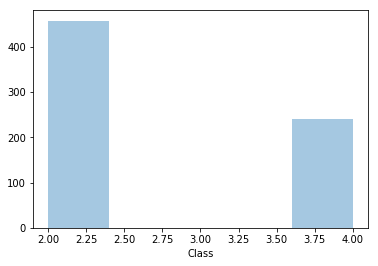

In [10]:
#Plotting chart for "Class" column distribution using SeaBorn
s = sns.distplot(BC_DataFrame["Class"], kde=False)
plt.show()

#### Plot the distribution of target variable using histogram

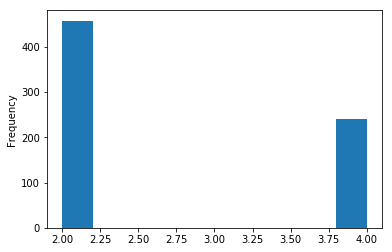

In [11]:
#Plotting chart for Years of experience of employees using matplotlib
BC_DataFrame["Class"].plot.hist()
plt.show()

#### Convert the datatype of Bare Nuclei to `int`

In [12]:
#Converting "Bare Nuclei" column data type from Object to Int
convert_datatypes = {'Bare Nuclei': int} 
BC_DataFrame = BC_DataFrame.astype(convert_datatypes)
#Checking implementation
BC_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [13]:
warnings.simplefilter('ignore')
#Using Pair Plot to understand the corelations 
#sns.pairplot(BC_DataFrame, diag_kind="kde", hue="Class")
#plt.show()
#Print Coorelation for "Class"
BC_DataFrame.corr()["Class"]

ID                            -0.080226
ClumpThickness                 0.716001
Cell Size                      0.817904
Cell Shape                     0.818934
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Bare Nuclei                    0.818968
Normal Nucleoli                0.756616
Bland Chromatin                0.712244
Mitoses                        0.423170
Class                          1.000000
Name: Class, dtype: float64

In [14]:
#Drop "Bare Nuclei" column as it has very strong corelation
#Removing column named "Bare Nuclei"
BC_DataFrame_Child = BC_DataFrame.drop("Bare Nuclei", axis=1)

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [15]:
X=BC_DataFrame_Child.drop("Class",axis=1)
Y=BC_DataFrame_Child["Class"]

In [16]:
#Checking
X.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses
0,1000025,5,1,1,1,2,3,1,1
1,1002945,5,4,4,5,7,3,2,1
2,1015425,3,1,1,1,2,3,1,1
3,1016277,6,8,8,1,3,3,7,1
4,1017023,4,1,1,3,2,3,1,1


In [17]:
#Checking
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

#### Divide the Training and Test sets in 70:30 

In [18]:
#Spliting Train and Test data 70% and 30% respectively
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [19]:
#Sclaing Data Based in StandardScaler i.e. Z/T Score
StSc=StandardScaler()
scaledX_train = StSc.fit_transform(X_train)
scaledX_test = StSc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [20]:
#Creating common function for kNN 
def knn_function(neighbors1, train_accuracy_plot1, test_accuracy_plot1):
    for i, k in enumerate(neighbors1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
        Sc = StandardScaler()
        scaledX_train = Sc.fit_transform(X_train)
        scaledX_test = Sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train, Y_train)
        #Compute accuracy on the training set
        train_accuracy_plot1[i] = knn.score(scaledX_train, Y_train)
        #Compute accuracy on the testing set
        test_accuracy_plot1[i] = knn.score(scaledX_test, Y_test)
        #Print Result
        print("For K=%d, Test Accuracy=%f, & Train Accuracy=%f"%(k, test_accuracy_plot1[i], train_accuracy_plot1[i]))
#Initiating the Model with K = 1, 3, 9
neighbors = np.array([3, 5, 9])
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
knn_function(neighbors, train_accuracy_plot, test_accuracy_plot)

For K=3, Test Accuracy=0.961905, & Train Accuracy=0.963190
For K=5, Test Accuracy=0.966667, & Train Accuracy=0.961145
For K=9, Test Accuracy=0.966667, & Train Accuracy=0.957055


## Find optimal value of K

# Answer: K = 5

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [21]:
#Initiating the Model with K = 1, 3, 5 ... 19
neighbors = np.arange(1, 20, 2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
knn_function(neighbors, train_accuracy_plot, test_accuracy_plot)

For K=1, Test Accuracy=0.923810, & Train Accuracy=1.000000
For K=3, Test Accuracy=0.961905, & Train Accuracy=0.963190
For K=5, Test Accuracy=0.966667, & Train Accuracy=0.961145
For K=7, Test Accuracy=0.961905, & Train Accuracy=0.952965
For K=9, Test Accuracy=0.966667, & Train Accuracy=0.957055
For K=11, Test Accuracy=0.966667, & Train Accuracy=0.961145
For K=13, Test Accuracy=0.966667, & Train Accuracy=0.959100
For K=15, Test Accuracy=0.966667, & Train Accuracy=0.959100
For K=17, Test Accuracy=0.966667, & Train Accuracy=0.957055
For K=19, Test Accuracy=0.966667, & Train Accuracy=0.955010


# Answer: K=5 and K=8

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

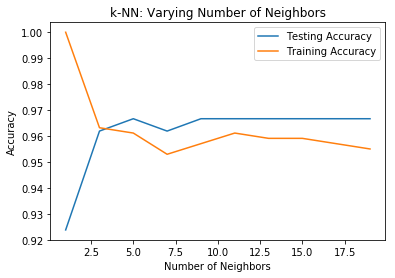

In [22]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()